# NLP Classification project

My steps:
1) Text preprocessing with explanations of all steps:
 * Cleaning
 * Tokenization
 * Normalisation (comparison of stemming and lemmatization)
 
2) Words importance

3) Hyperparameters tuning

4) Compare performance of models

Import helpful lidraries and read csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, classification_report
from matplotlib import rcParams
from sklearn.svm import SVR
from scipy.stats import normaltest
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set_context('talk')
sns.set_style('darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

from nltk.corpus import stopwords
import nltk
nltk.download()
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
from sklearn.pipeline import Pipeline, make_pipeline
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [4]:
data = pd.read_csv('LargeMovieReviewDataset.csv')

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
data.count() / data.shape[0]

review       1.0
sentiment    1.0
dtype: float64

<Figure size 864x504 with 0 Axes>

<AxesSubplot:xlabel='sentiment', ylabel='count'>

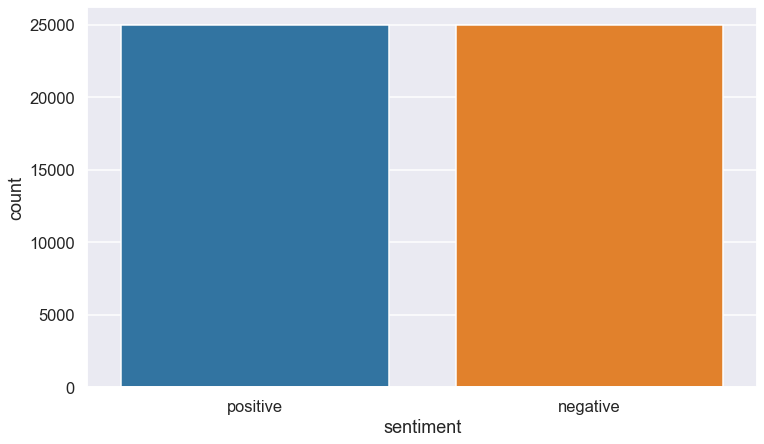

In [8]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'sentiment', data = data)
plt.show()

In [9]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [10]:
data.rename(columns={'sentiment01':'sentiment'},inplace=True)

## Drop duplicates

In [11]:
data.drop_duplicates(subset ="review",
                     keep = False, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49176 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49176 non-null  object
 1   sentiment  49176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


## Tokenization & Pipline

In [13]:
printer = stopwords.words('english')
printer.extend([",",'<','>','br','.','/','...','....','..','(',')'])
print(printer)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words=printer)),
    ('estimator', LogisticRegression())
])

In [18]:
Xi_train = X_train.copy()

In [16]:
X = data.drop(['sentiment'], axis=1)
y = data.sentiment

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.review, y, test_size=0.30, random_state=42)

In [44]:
#X_train.review.values.reshape(1,-1)

In [19]:
X_train
y_train

8546     So, you've seen the Romero movies, yes? And yo...
24251    This film is the best film Jim Carrey has ever...
46632    I caught this film -- under the title of "What...
3893     Ever once in a while I run into a movie that i...
10442    CyberTracker is set in Los Angeles sometime in...
                               ...                        
11456    It is hard to put the devastating beauty of Tr...
45471    Through its 2-hour running length, Crash chart...
38789    The violent and rebel twenty-five years old sa...
872      This is the second Hitchcock film to appear on...
16052    OK..this movie could have been soooo good! All...
Name: review, Length: 34423, dtype: object

8546     0
24251    1
46632    0
3893     0
10442    0
        ..
11456    1
45471    0
38789    1
872      1
16052    0
Name: sentiment, Length: 34423, dtype: int64

In [28]:
pipeline.fit(X_train,y_train)

E:\Python\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('estimator', LogisticRegression())])

In [30]:
pipeline.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
y_test_pred = pipeline.predict(X_test)

In [32]:
def checker(arr1, arr2):
    sumi = 0
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            sumi += 1
    return sumi/len(arr1)

In [33]:
print(checker(y_test_pred,y_test.values))

0.8823290178268827


In [34]:
print(classification_report(y_test_pred,y_test.values))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7249
           1       0.89      0.88      0.88      7504

    accuracy                           0.88     14753
   macro avg       0.88      0.88      0.88     14753
weighted avg       0.88      0.88      0.88     14753



In [35]:
vectorizer = CountVectorizer()

In [36]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
class MyTransformer(BaseEstimator, TransformerMixin): 
    def __init__(self):
        BaseEstimator.__init__(self)
        TransformerMixin.__init__(self)
    def fit(self, ar, y=None):
        return self
    def transform(self, ar, y=None):
        j = 0
        for i in range(ar.shape[0]):
            a = ""
            words = word_tokenize(ar.values[i])
            for j in range(len(words)):
                if j == 0:
                    a += porter.stem(words[j])
                else:
                    a += (" " + porter.stem(words[j]))
            ar.values[i] = a
        return ar

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
class MyTransformerLanc(BaseEstimator, TransformerMixin): 
    def __init__(self):
        BaseEstimator.__init__(self)
        TransformerMixin.__init__(self)
    def fit(self, ar, y=None):
        return self
    def transform(self, ar, y=None):
        j = 0
        for i in range(ar.shape[0]):
            a = ""
            words = word_tokenize(ar.values[i])
            for j in range(len(words)):
                if j == 0:
                    a += lancaster.stem(words[j])
                else:
                    a += (" " + lancaster.stem(words[j]))
            ar.values[i] = a
        return ar

In [38]:
word_tokenize(X_train.values[3])[0]

'Ever'

In [39]:
z = ['cats','dogs']
print(z)
print((z))

['cats', 'dogs']
['cats', 'dogs']


In [41]:
class_mt = MyTransformer()
class_mt.fit(X_test)

MyTransformer()

In [46]:
X_train
y_train

8546     So, you've seen the Romero movies, yes? And yo...
24251    This film is the best film Jim Carrey has ever...
46632    I caught this film -- under the title of "What...
3893     Ever once in a while I run into a movie that i...
10442    CyberTracker is set in Los Angeles sometime in...
                               ...                        
11456    It is hard to put the devastating beauty of Tr...
45471    Through its 2-hour running length, Crash chart...
38789    The violent and rebel twenty-five years old sa...
872      This is the second Hitchcock film to appear on...
16052    OK..this movie could have been soooo good! All...
Name: review, Length: 34423, dtype: object

8546     0
24251    1
46632    0
3893     0
10442    0
        ..
11456    1
45471    0
38789    1
872      1
16052    0
Name: sentiment, Length: 34423, dtype: int64

In [43]:
pipelineNew = Pipeline([
    ('MyTrans', MyTransformer()),
    ('vec', CountVectorizer(stop_words=printer)),
    ('log_reg', LogisticRegression())
])

In [ ]:
pipelineNew.fit_transform(X_train,y_train)

In [69]:
from sklearn.model_selection import KFold
grid_search_log_reg = GridSearchCV(estimator=pipelineNew, param_grid={'log_reg__C': [0.1,0.5,1,5]}, cv=KFold(n_splits=5), scoring="roc_auc", n_jobs=-1)

In [109]:
grid_search_log_reg.fit(X_train,y_train)

E:\Python\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('MyTrans', MyTransformer()),
                                       ('vec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                     

In [110]:
grid_search_log_reg.best_params_

{'log_reg__C': 0.1}

In [111]:
y_pred = grid_search_log_reg.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7335
           1       0.88      0.89      0.88      7418

    accuracy                           0.88     14753
   macro avg       0.88      0.88      0.88     14753
weighted avg       0.88      0.88      0.88     14753



In [137]:
data.review.shape[0]

49176

In [ ]:
def sum_rev(X):
    read = ''
    for i in range(X.shape[0]):
        read += X[i]
    return read
get_top_n_words(sum_rev(data.review))

Logistic: ROC AUC=0.883


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

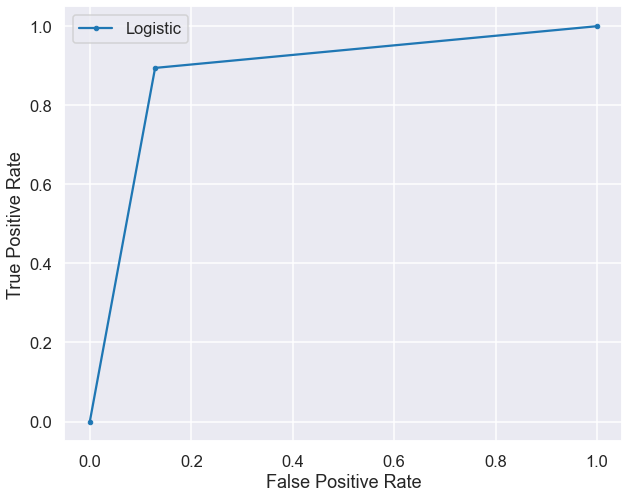

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
lr_probs = y_pred

lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Most comman words:

In [57]:
X_train

8546     So, you've seen the Romero movies, yes? And yo...
24251    This film is the best film Jim Carrey has ever...
46632    I caught this film -- under the title of "What...
3893     Ever once in a while I run into a movie that i...
10442    CyberTracker is set in Los Angeles sometime in...
                               ...                        
11456    It is hard to put the devastating beauty of Tr...
45471    Through its 2-hour running length, Crash chart...
38789    The violent and rebel twenty-five years old sa...
872      This is the second Hitchcock film to appear on...
16052    OK..this movie could have been soooo good! All...
Name: review, Length: 34423, dtype: object

In [59]:
cvect = CountVectorizer(stop_words=printer, ngram_range=(1, 2))
text_cvect = cvect.fit_transform(X_train)
cvect.vocabulary_

{'seen': 1866696,
 'romero': 1791323,
 'movies': 1402598,
 'yes': 2397229,
 'jacob': 1109986,
 'ladder': 1170245,
 'right': 1774113,
 'later': 1179927,
 'hellraiser': 985221,
 'okay': 1489344,
 'let': 1204832,
 'make': 1286726,
 'movie': 1393970,
 'three': 2145622,
 'jam': 1110989,
 'everything': 702356,
 'together': 2166471,
 'whole': 2339800,
 'big': 226549,
 'mess': 1345408,
 'sounds': 1980164,
 'like': 1216809,
 'good': 913001,
 'idea': 1042192,
 'terrible': 2119024,
 'absolutely': 25667,
 'god': 905657,
 'awful': 168799,
 'yeah': 2393207,
 'indie': 1069227,
 'flick': 814715,
 'gives': 897986,
 'crap': 473141,
 'pass': 1544674,
 'filmic': 791101,
 'excrement': 714280,
 'film': 781470,
 'attempts': 154171,
 'establish': 686719,
 'credibility': 479613,
 'focusing': 821237,
 'character': 345820,
 'interaction': 1089249,
 'much': 1408301,
 'evident': 704293,
 'unfortunately': 2235684,
 'writers': 2386442,
 'night': 1453208,
 'living': 1241225,
 'dead': 516380,
 'characters': 349878,
 '

<Figure size 864x720 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

<Figure size 720x576 with 0 Axes>

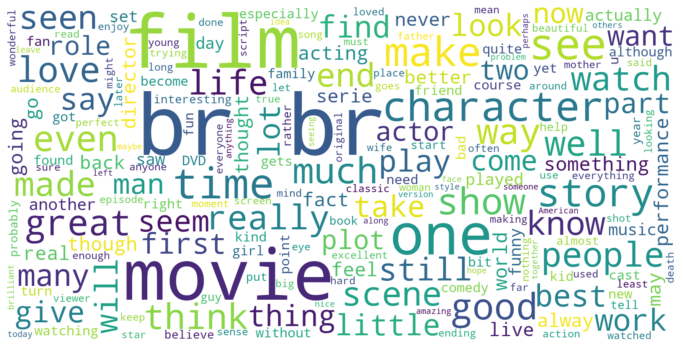

In [63]:
from wordcloud import WordCloud, STOPWORDS

fig = plt.figure()
plt.figure(figsize=(12,10))
plt.axis("off")

pos_tweets = data[data["sentiment"] == 1]
pos_string = []
for t in pos_tweets["review"]:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=" ")

pos_wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(pos_string)
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.show()

In [70]:
pipelineNewLan = Pipeline([
    ('MyTrans', MyTransformerLanc()),
    ('vec', CountVectorizer(stop_words=printer)),
    ('log_reg', LogisticRegression())
])
grid_search_log_reg = GridSearchCV(estimator=pipelineNewLan, param_grid={'log_reg__C': [0.02,0.05,0.1,0.5]}, cv=KFold(n_splits=5), scoring="roc_auc", n_jobs=-1)

In [71]:
grid_search_log_reg.fit(X_train,y_train)

E:\Python\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('MyTrans', MyTransformerLanc()),
                                       ('vec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                 

In [72]:
grid_search_log_reg.best_params_
y_pred = grid_search_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

{'log_reg__C': 0.05}

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7335
           1       0.88      0.89      0.89      7418

    accuracy                           0.88     14753
   macro avg       0.88      0.88      0.88     14753
weighted avg       0.88      0.88      0.88     14753



In [73]:
print(checker(y_pred,y_test.values))

0.8849047651325154


LancasterStemmer is better

In [80]:
from nltk.stem import WordNetLemmatizer

In [81]:
wordnet_lemmatizer = WordNetLemmatizer()

In [99]:
class MyTransformerLemm(BaseEstimator, TransformerMixin): 
    def __init__(self):
        BaseEstimator.__init__(self)
        TransformerMixin.__init__(self)
    def fit(self, ar, y=None):
        return self
    def transform(self, ar, y=None):
        j = 0
        for i in range(ar.shape[0]):
            a = ""
            words = word_tokenize(ar.values[i])
            for j in range(len(words)):
                if j == 0:
                    a += wordnet_lemmatizer.lemmatize(words[j])
                else:
                    a += (" " + wordnet_lemmatizer.lemmatize(words[j]))
            ar.values[i] = a
        return ar

In [100]:
wordnet_lemmatizer = WordNetLemmatizer()
print("Starting")
print(wordnet_lemmatizer.lemmatize("starting", pos="v"))
print(lancaster.stem("Starting"))

Starting
start
start


In [101]:
pipelineNewLemm = Pipeline([
    ('MyTrans', MyTransformerLemm()),
    ('vec', CountVectorizer(stop_words=printer)),
    ('log_reg', LogisticRegression(C = 0.05, n_jobs=-1))
])

In [102]:
pipelineNewLemm.fit(X_train,y_train)

Pipeline(steps=[('MyTrans', MyTransformerLemm()),
                ('vec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log_reg', LogisticRegression(C=0.05, n_jobs=-1))])

In [112]:
y_pred = pipelineNewLemm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7335
           1       0.88      0.89      0.88      7418

    accuracy                           0.88     14753
   macro avg       0.88      0.88      0.88     14753
weighted avg       0.88      0.88      0.88     14753



As we can see in this task Strming works better than Lemmatization

## Tf-idf

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
pipelineNewTf = Pipeline(
    [('MyTrans', MyTransformerLanc()),
     ("vectorizer", TfidfVectorizer(stop_words=printer)),
    ('sgd', LogisticRegression(C = 0.05, n_jobs=-1))
    ]
)

In [78]:
pipelineNewTf.fit(X_train,y_train)

Pipeline(steps=[('MyTrans', MyTransformerLanc()),
                ('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('sgd', LogisticRegression(C=0.05, n_jobs=-1))])

In [113]:
y_pred = pipelineNewTf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7335
           1       0.83      0.89      0.86      7418

    accuracy                           0.85     14753
   macro avg       0.85      0.85      0.85     14753
weighted avg       0.85      0.85      0.85     14753



Box of words better than tf-idf

## SVM

In [115]:
from sklearn.svm import SVC
pipelineNewSVM = Pipeline(
    [('MyTrans', MyTransformerLanc()),
     ("vectorizer", CountVectorizer(stop_words=printer)),
    ('svc', SVC(C = 0.05))
    ]
)

In [116]:
pipelineNewSVM.fit(X_train,y_train)

Pipeline(steps=[('MyTrans', MyTransformerLanc()),
                ('vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('svc', SVC(C=0.05))])

In [117]:
y_pred = pipelineNewSVM.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      7335
           1       0.75      0.89      0.81      7418

    accuracy                           0.79     14753
   macro avg       0.80      0.79      0.79     14753
weighted avg       0.80      0.79      0.79     14753



## Naive Bayes

In [119]:
from sklearn.naive_bayes import MultinomialNB
pipelineNewNB = Pipeline(
    [('MyTrans', MyTransformerLanc()),
     ("vectorizer", CountVectorizer(stop_words=printer)),
    ('NB', MultinomialNB())
    ]
)

In [120]:
pipelineNewNB.fit(X_train,y_train)

Pipeline(steps=[('MyTrans', MyTransformerLanc()),
                ('vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('NB', MultinomialNB())])

In [121]:
y_pred = pipelineNewNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7335
           1       0.86      0.82      0.84      7418

    accuracy                           0.84     14753
   macro avg       0.84      0.84      0.84     14753
weighted avg       0.84      0.84      0.84     14753



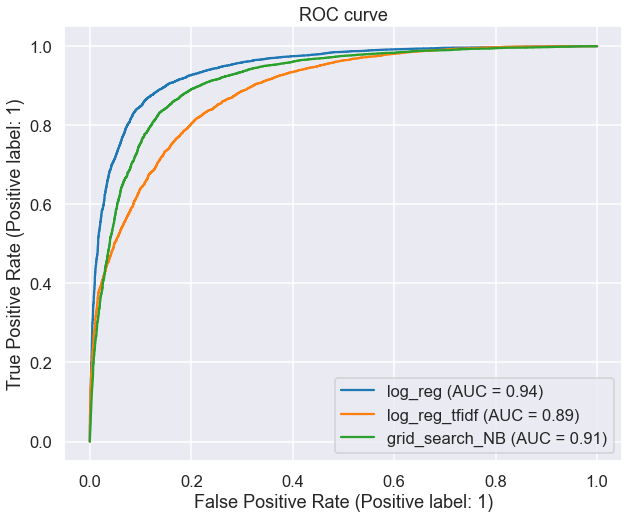

In [125]:
fig, ax = plt.subplots()
from sklearn.metrics import plot_roc_curve
models = [
    ("log_reg", grid_search_log_reg.best_estimator_),
    ("log_reg_tfidf", pipelineNewSVM),
    ("grid_search_NB", pipelineNewNB)
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = plot_roc_curve(
        pipeline, X_test, y_test, ax=ax, name=name)
_ = ax.set_title('ROC curve')